## Life cycle of Machine learning Project

* Understanding the Problem Statement
* Data Collection
* Data Checks to perform
* Exploratory data analysis
* Data Pre-Processing
* Model Training
* Choose best model

### Problem Statement
To understand how the student's performance is affected by variables such as gender, ethinicity, parental level of education, test preparation etc.

Dataset - from Kaggle Students performance in Exams https://www.kaggle.com/datasets/spscientist/students-performance-in-exams/data

In [1]:
#importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline
plt.rcParams["figure.figsize"] = (15.0,8.0)

In [2]:
#read the file
df = pd.read_csv('data/StudentsPerformance.csv')
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [3]:
df.shape

(1000, 8)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


## Data Inspection
* Check Missing Value
* Check Duplicates
* Check datatype
* Check the no of unique values of each column
* Check the statistics of dataset
* Check various categories present in each categorical column

In [5]:
#Check Missing values
df.isna().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

There are no missing values in the dataset

In [6]:
#check duplicates
df.duplicated().sum()

0

There are no duplicate values in the dataset

In [7]:
#Check datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


There are 5 categorical values and 3 numerical variables in the dataset

In [8]:
#checking the number of unique values present in the variables
df.nunique()

gender                          2
race/ethnicity                  5
parental level of education     6
lunch                           2
test preparation course         2
math score                     81
reading score                  72
writing score                  77
dtype: int64

In [9]:
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


* From the above description of numerical data, all means, sd are very close to each other. 
* The min score for math is 0 , for reading the minimum score is 17 and maximum and for writing is 10 and the maximum for all is 100.


## Data Exploration

In [10]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [11]:
for i in df.columns:
    if(df[i].dtype == "O"):
        print("Categories in '{}' variable : ".format(i), end=" ")
        print(df[i].unique())

Categories in 'gender' variable :  ['female' 'male']
Categories in 'race/ethnicity' variable :  ['group B' 'group C' 'group A' 'group D' 'group E']
Categories in 'parental level of education' variable :  ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
Categories in 'lunch' variable :  ['standard' 'free/reduced']
Categories in 'test preparation course' variable :  ['none' 'completed']


In [12]:
#define numerical and categorical features
numerical_features = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']

print("We have {} numerical features : {}".format(len(numerical_features), numerical_features))
print("We have {} categorical features : {}".format(len(categorical_features), categorical_features))

We have 3 numerical features : ['math score', 'reading score', 'writing score']
We have 5 categorical features : ['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course']


# Adding columns for Total_Scores and Average

In [13]:
df['total_score'] = df['math score'] + df['reading score'] + df['writing score']
df['average'] = round(df['total_score']/3,2)
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total_score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.67
1,female,group C,some college,standard,completed,69,90,88,247,82.33
2,female,group B,master's degree,standard,none,90,95,93,278,92.67
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.33
4,male,group C,some college,standard,none,76,78,75,229,76.33


In [14]:
#No of students who get full mark in Matn, reading and writing
math_full = len(df[df['math score']==100])
read_full = len(df[df['reading score']==100])
write_full = len(df[df['writing score']==100])

print("Number of students with full marks in Maths : ",math_full)
print(f'Number of students with full mark in reading: {read_full}')
print("Number of students with full mark in writing: {}".format(write_full))

Number of students with full marks in Maths :  7
Number of students with full mark in reading: 17
Number of students with full mark in writing: 14


In [15]:
# no: of students with less than 20 marks in each subject
math_less_20 = len(df[df['math score']<20])
reading_less_20 = len(df[df['reading score']<20])
writing_less_20 =  len(df[df['writing score']<20])

print("Number of students with less than 20 marks in Maths : ",math_less_20)
print(f'Number of students with less than 20 in reading: {reading_less_20}')
print("Number of students with less than 20 in writing: {}".format(writing_less_20))

Number of students with less than 20 marks in Maths :  4
Number of students with less than 20 in reading: 1
Number of students with less than 20 in writing: 3


In [29]:
math_mean = df['math score'].mean()
math_median = df['math score'].median()
print(f"The mean for math score :{math_mean}")
print(f"The median for math score :{math_median}")
read_mean = df['reading score'].mean()
read_median = df['reading score'].median()
print(f"The mean for reading score :{read_mean}")
print(f"The median for reading score :{read_median}")
write_mean = df['writing score'].mean()
write_median = df['writing score'].median()
print(f"The mean for writing score :{write_mean}")
print(f"The median for writing score :{write_median}")

The mean for math score :66.089
The median for math score :66.0
The mean for reading score :69.169
The median for reading score :70.0
The mean for writing score :68.054
The median for writing score :69.0


* From the above values, we can infer that students have performed worst in maths, since the no: of students with full mark is only 7 and no with less than 20 is 4, higher than reading and writing.
* Best performance is in reading

## Visualization of Data

### Univariate Analysis

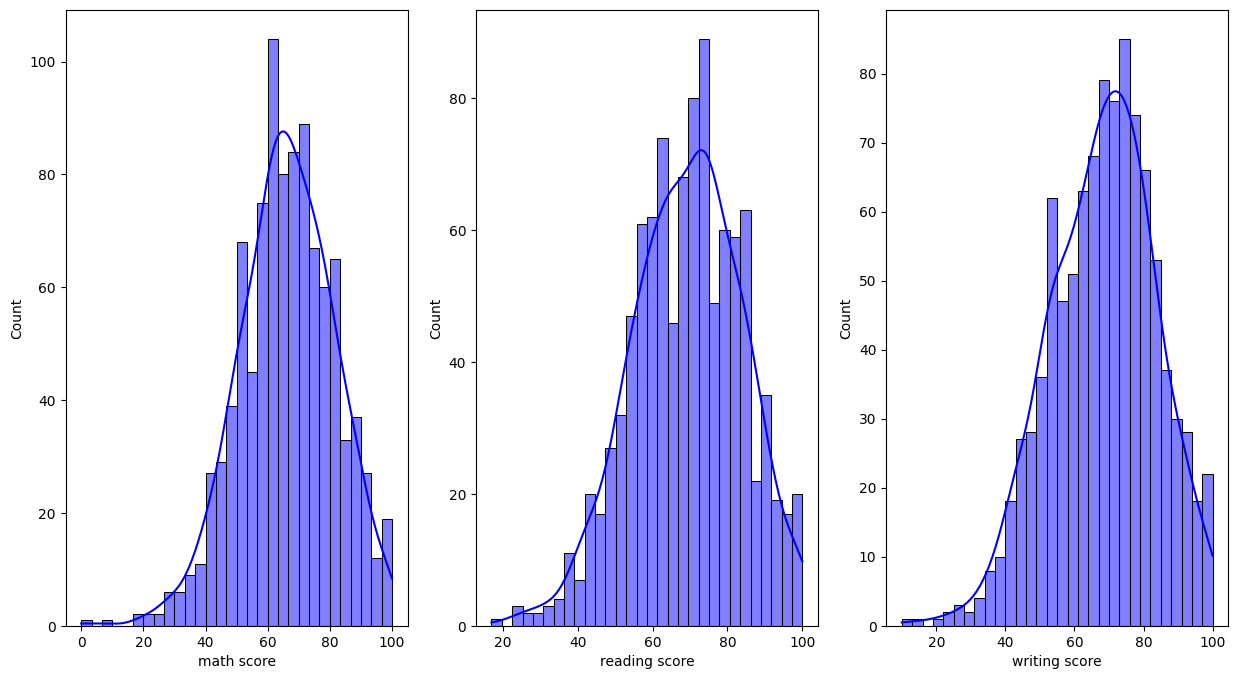

In [16]:
#Histogram & KDE
for i, col in enumerate(numerical_features):
    plt.subplot(1,3, i+1)
    sns.histplot(data=df,x=col,kde=True, bins=30, color='blue')
plt.show()

In [17]:
cat_length = 7
int(cat_length//2)

3

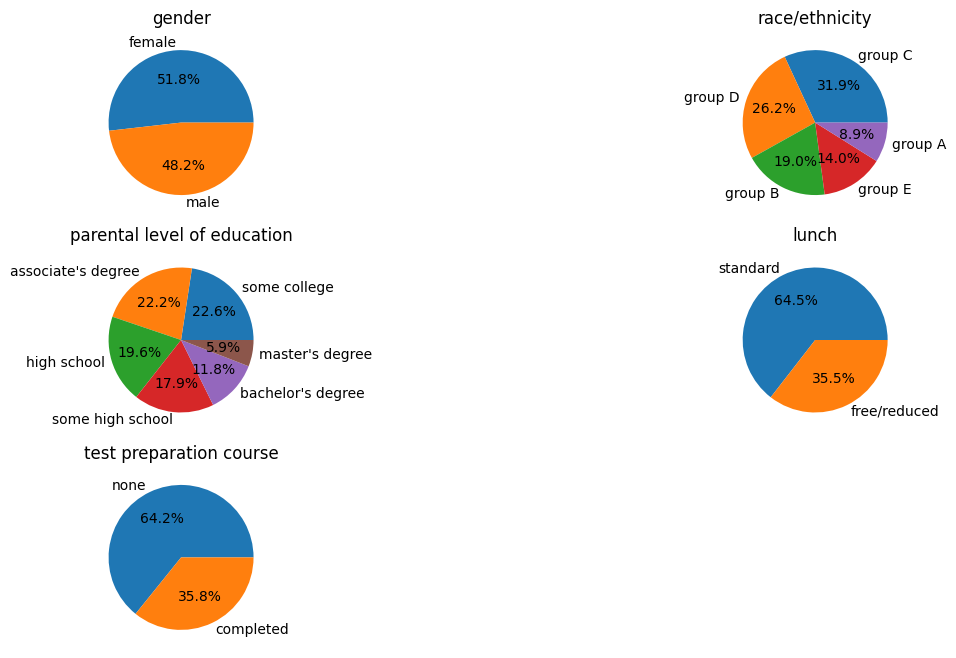

In [18]:
cat_length = len(categorical_features)
for i,col in enumerate(categorical_features):
    plt.subplot(3,2,i+1)
    x = df[col].value_counts().reset_index()
    plt.pie(x['count'], labels=x[col], autopct= "%0.1f%%")
    plt.title(col)
    
   

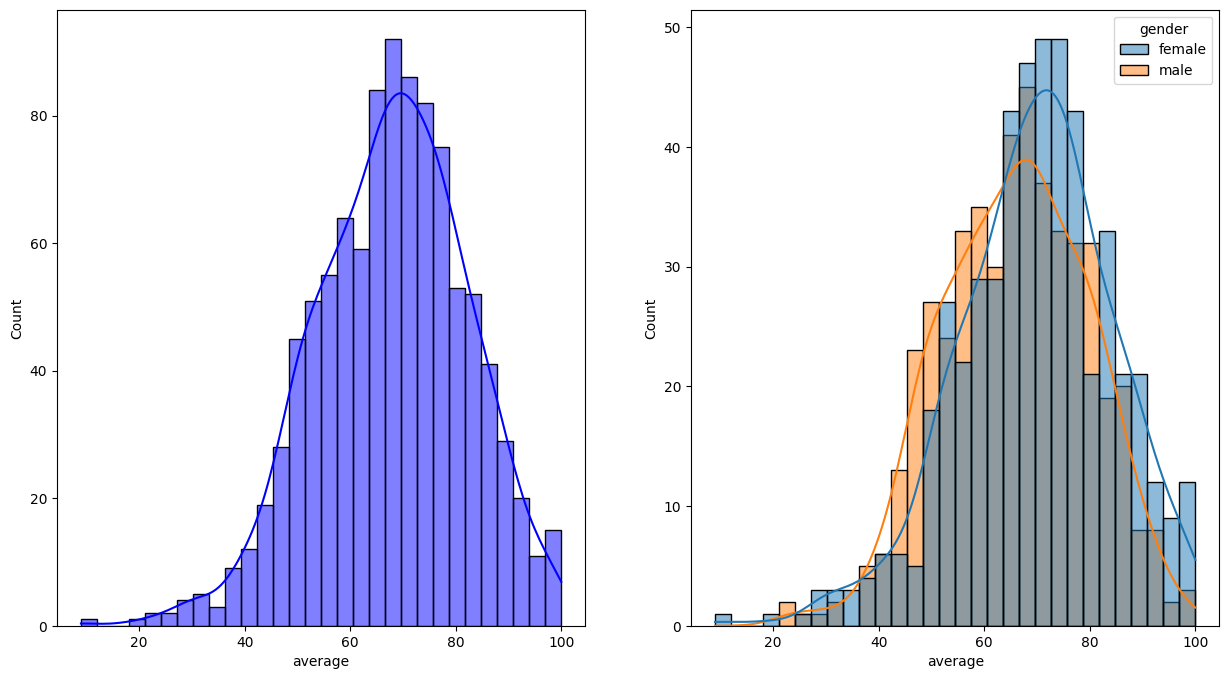

In [19]:
#Visualize average score distribution to make some conclusion
plt.subplot(1,2,1)
sns.histplot(data=df, x='average',bins=30, kde=True, color='blue')
plt.subplot(1,2,2)
sns.histplot(data=df, x='average',bins=30, kde=True, hue='gender')
plt.show()

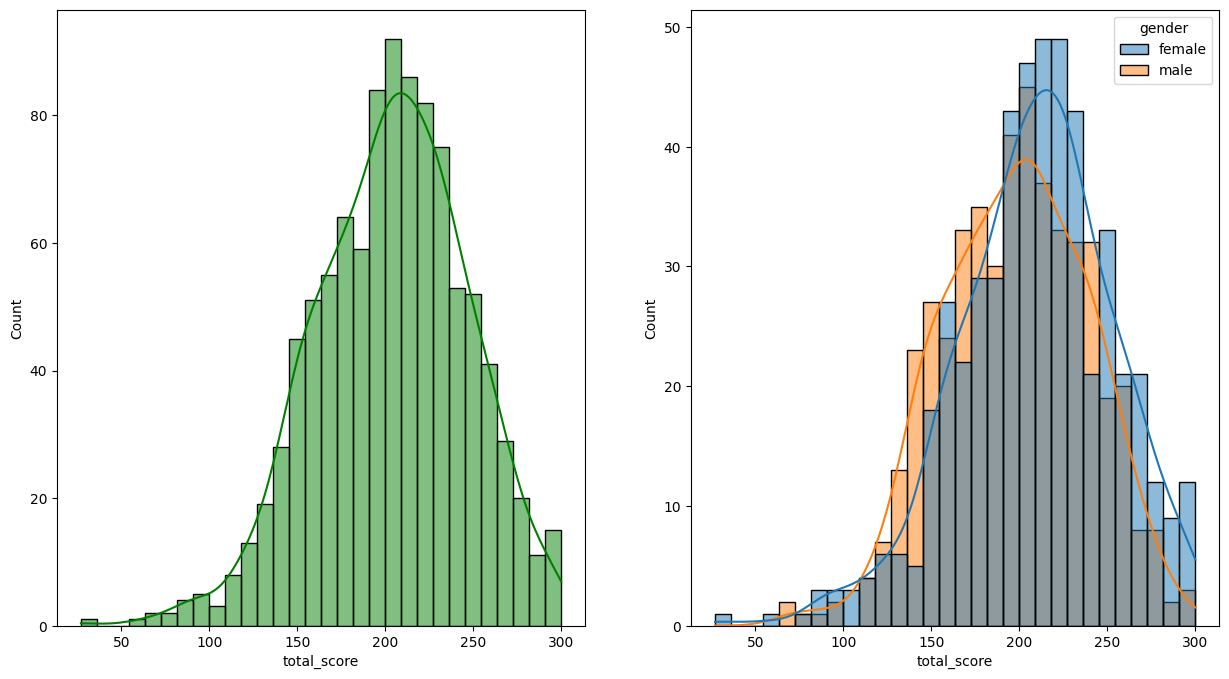

In [20]:
plt.subplot(1,2,1)
sns.histplot(data=df, x='total_score', bins=30, kde=True, color='green')
plt.subplot(1,2,2)
sns.histplot(data=df, x='total_score', bins=30, kde=True, hue='gender')
plt.show()

from the above figures, it is clear that female students tends to perform well than male students

In [21]:
df.columns

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score', 'total_score', 'average'],
      dtype='object')

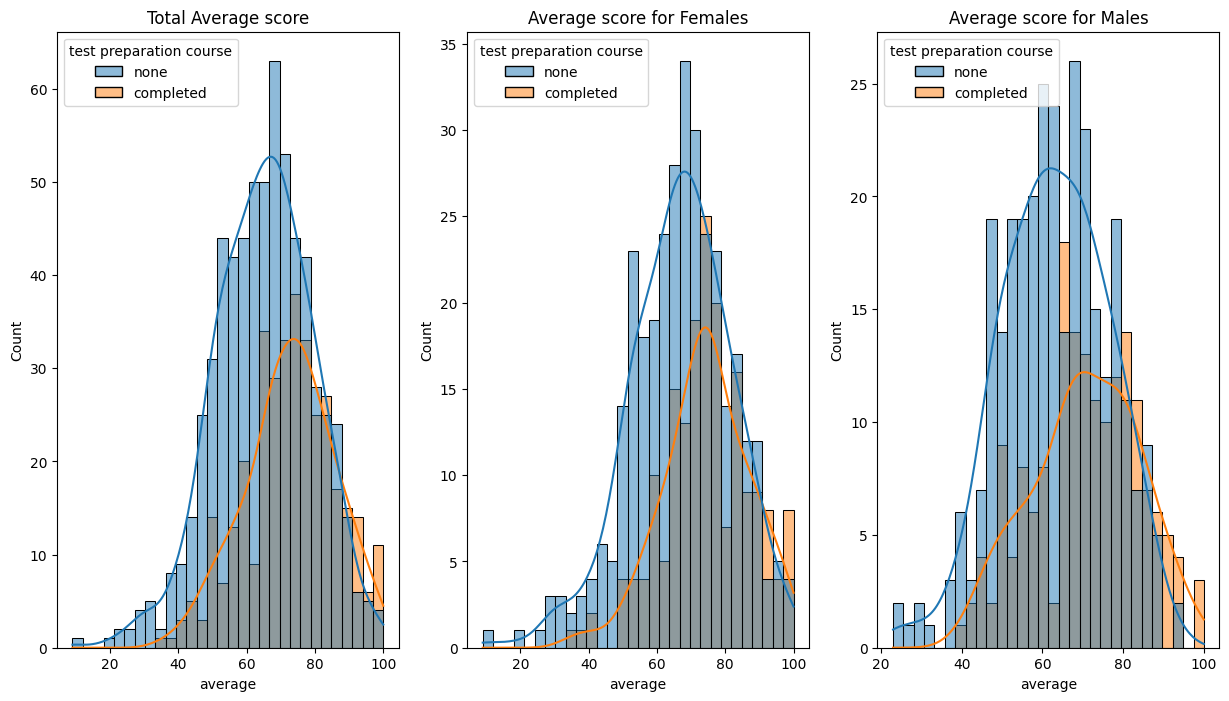

In [22]:
#Test preparation course have any effect on the marks score.
plt.subplot(1,3,1)
plt.title("Total Average score")
sns.histplot(data=df, x ='average',hue='test preparation course', bins=30, kde=True, color='blue')
plt.subplot(1,3,2)
plt.title("Average score for Females")
sns.histplot(data=df[df.gender=="female"],x='average', hue='test preparation course',bins=30, kde=True, color='o')
plt.subplot(1,3,3)
plt.title("Average score for Males")
sns.histplot(data=df[df.gender=="male"], x='average', hue='test preparation course',bins=30, kde=True, color='c')
plt.show()

Not a significant impact on exam with test preparation course.

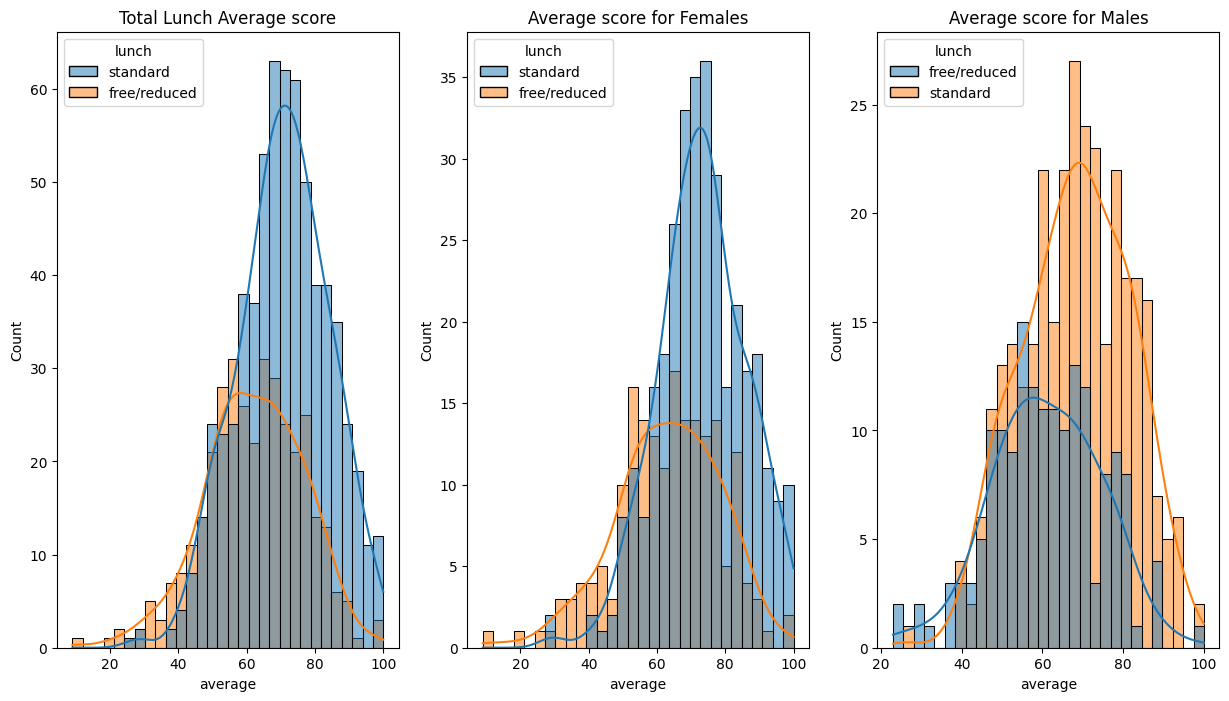

In [23]:
#Test preparation course have any effect on the marks score.
plt.subplot(1,3,1)
plt.title("Total Lunch Average score")
sns.histplot(data=df, x ='average',hue='lunch', bins=30, kde=True, color='blue')
plt.subplot(1,3,2)
plt.title("Average score for Females")
sns.histplot(data=df[df.gender=="female"],x='average', hue='lunch',bins=30, kde=True, color='o')
plt.subplot(1,3,3)
plt.title("Average score for Males")
sns.histplot(data=df[df.gender=="male"], x='average', hue='lunch',bins=30, kde=True, color='c')
plt.show()

Standard lunch helps perform well in exams, be it a male or female.

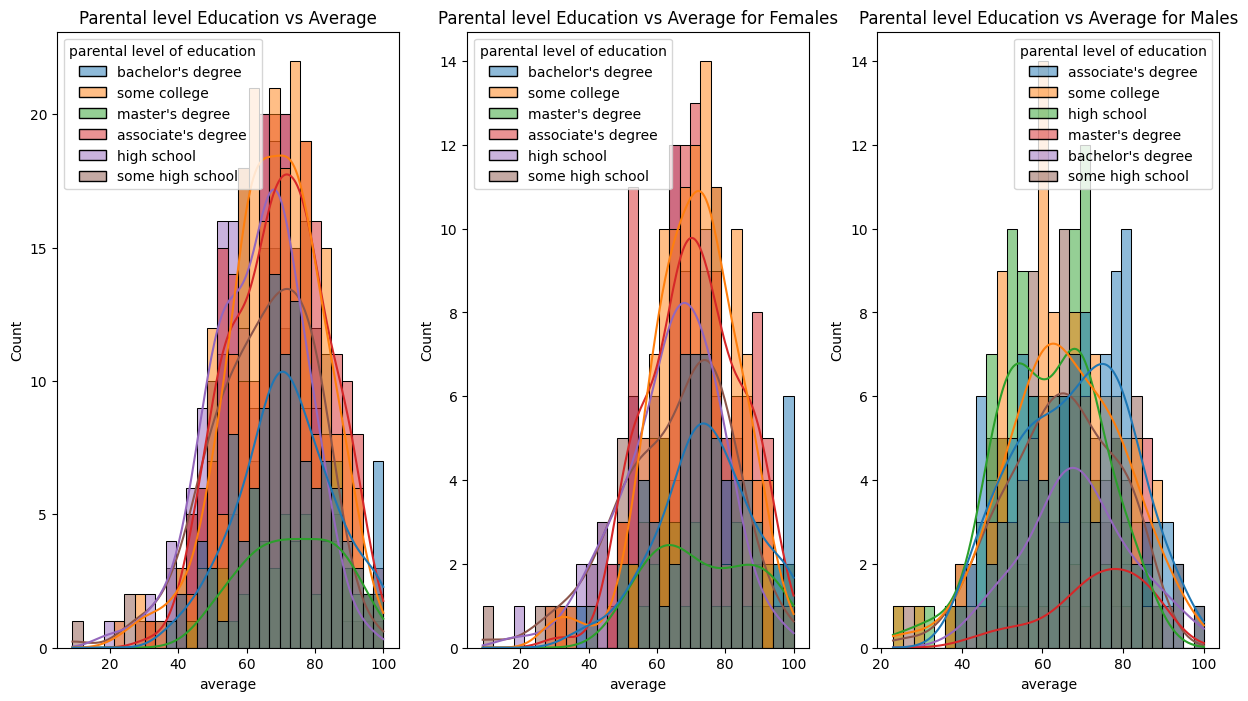

In [24]:
plt.subplot(1,3,1)
plt.title("Parental level Education vs Average")
sns.histplot(data=df, x ='average',hue='parental level of education', bins=30, kde=True, color='blue')
plt.subplot(1,3,2)
plt.title("Parental level Education vs Average for Females")
sns.histplot(data=df[df.gender=="female"],x='average', hue='parental level of education',bins=30, kde=True, color='o')
plt.subplot(1,3,3)
plt.title("Parental level Education vs Average for Males")
sns.histplot(data=df[df.gender=="male"], x='average', hue='parental level of education',bins=30, kde=True, color='c')
plt.show()

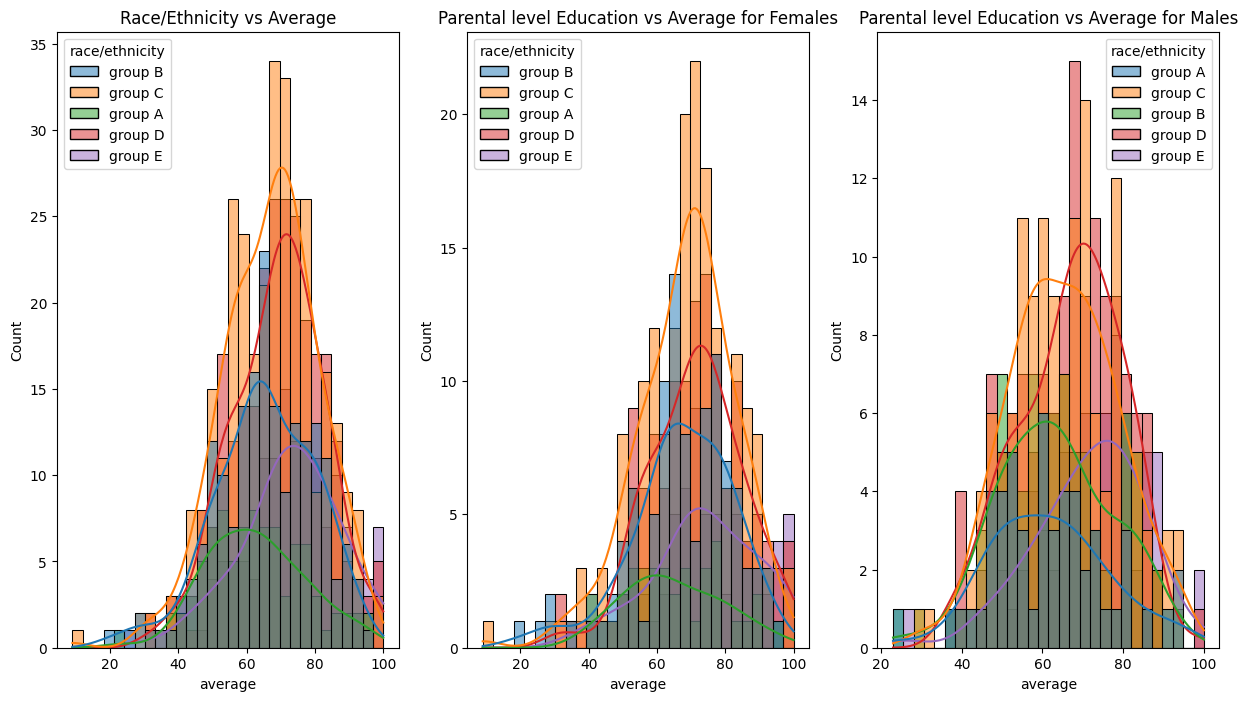

In [25]:
plt.subplot(1,3,1)
plt.title("Race/Ethnicity vs Average")
sns.histplot(data=df, x ='average',hue='race/ethnicity', bins=30, kde=True, color='blue')
plt.subplot(1,3,2)
plt.title("Parental level Education vs Average for Females")
sns.histplot(data=df[df.gender=="female"],x='average', hue='race/ethnicity',bins=30, kde=True, color='o')
plt.subplot(1,3,3)
plt.title("Parental level Education vs Average for Males")
sns.histplot(data=df[df.gender=="male"], x='average', hue='race/ethnicity',bins=30, kde=True, color='c')
plt.show()

Insights
* Students of group A and group B tends to perform poorly in exam.
* Students of group A and group B tends to perform poorly in exam irrespective of whether they are male or female* 

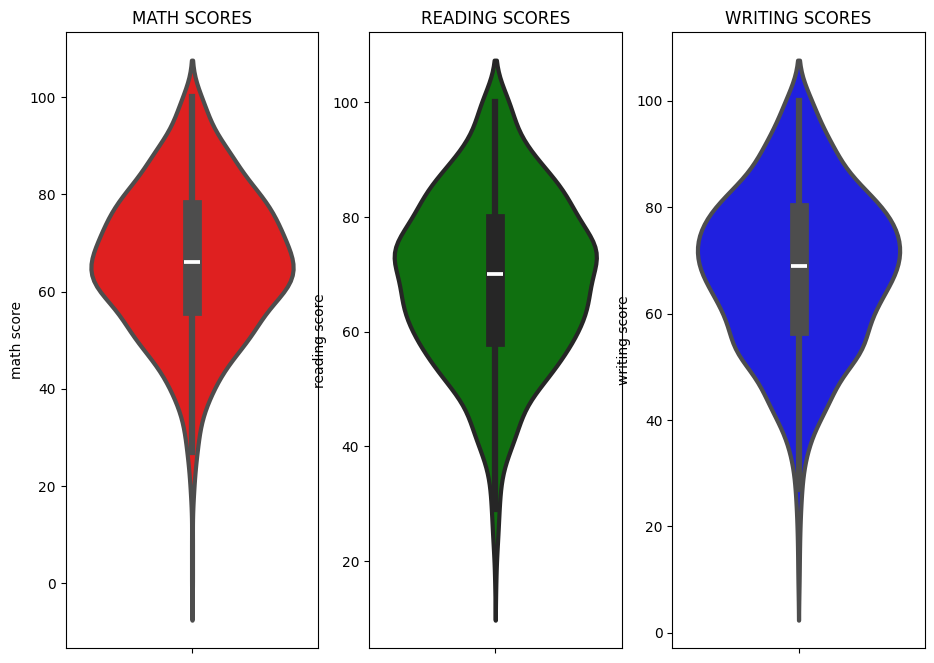

In [26]:
plt.subplot(1, 4, 1)
plt.title('MATH SCORES')
sns.violinplot(y='math score',data=df,color='red',linewidth=3)
plt.subplot(1, 4, 2)
plt.title('READING SCORES')
sns.violinplot(y='reading score',data=df,color='green',linewidth=3)
plt.subplot(1, 4, 3)
plt.title('WRITING SCORES')
sns.violinplot(y='writing score',data=df,color='blue',linewidth=3)
plt.show()

From the above three plots its clearly visible that most of the students score in between 60-80 in Maths whereas in reading and writing most of them score from 50-80